In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import sys
import os
sys.path.append('../..')
from src.features.processing_func import check_coords, calc_N2_kappa, calc_hab, arctic_calchab
from src.utils.directories import get_parent_directory

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
arctic_mix = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/arctic_mix.nc"
alberto_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/alberto_ds.nc"
global_pkl = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/input_microstructure.pkl"
global_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/L2_2D_snapshot_iy150_model_input.nc"
mosaic_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/mosaic_ds.nc"
nice_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/nice_ds.nc"
HM_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/HM_ds.nc"
NN_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/L2_2D_snapshot_iy150_model_input.nc"

arctic_ds = xr.open_dataset(arctic_mix)
alberto_ds = xr.open_dataset(alberto_nc)
global_ds = pd.read_pickle(global_pkl)
global_nn = xr.open_dataset(global_nc)
mosaic_ds = xr.open_dataset(mosaic_nc)
nice_ds = xr.open_dataset(nice_nc)
HM_ds = xr.open_dataset(HM_nc)
NN_ds = xr.open_dataset(NN_nc)

In [3]:
HM_kappa = HM_ds.squeeze()
arctic_ds = arctic_ds.squeeze()
arctic_ds = arctic_ds.transpose()
HM_kappa = HM_kappa.transpose('depth', 'profile')

nice_kappa = calc_N2_kappa(nice_ds)
mosaic_kappa = calc_N2_kappa(mosaic_ds)
HM_kappa = calc_N2_kappa(HM_kappa)
arctic_kappa = calc_N2_kappa(arctic_ds)
alberto_kappa = calc_N2_kappa(alberto_ds)

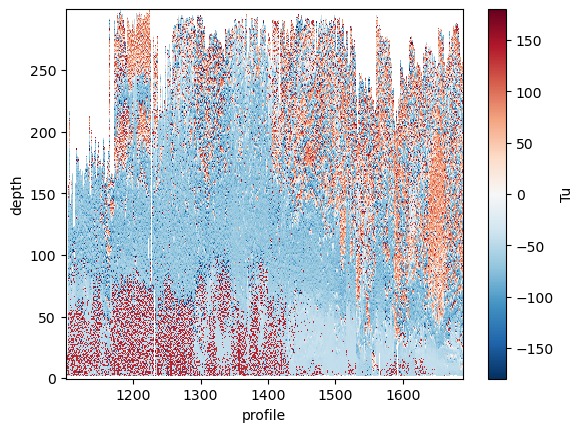

In [ ]:
nice_kappa.Tu.plot()

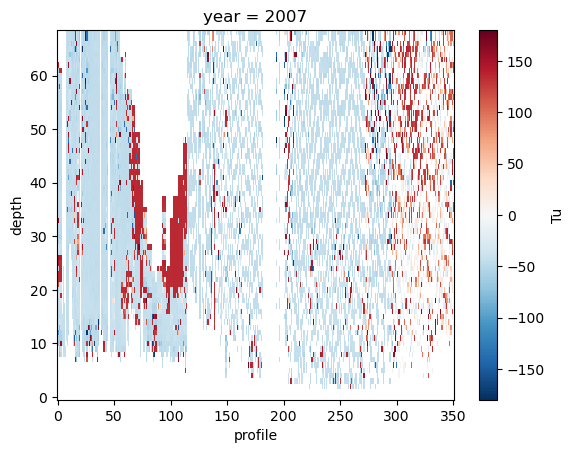

In [42]:
alberto_kappa.Tu.plot()

In [43]:
arctic_pickle = '/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/ml_ready/arctic2_1805.pkl'
hallo = pd.read_pickle(arctic_pickle)

<AxesSubplot:ylabel='Frequency'>

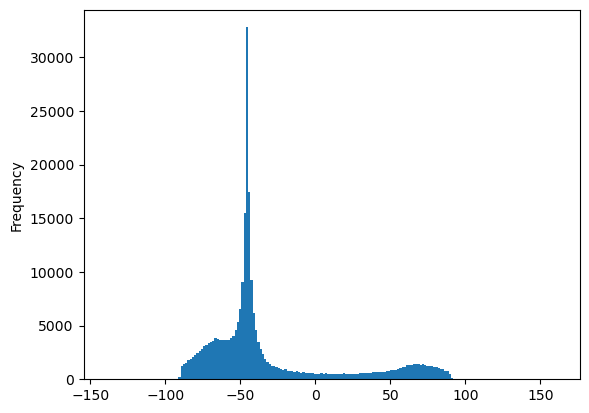

In [44]:
hallo.Tu.plot.hist(bins=200)

<AxesSubplot:xlabel='depth', ylabel='Tu'>

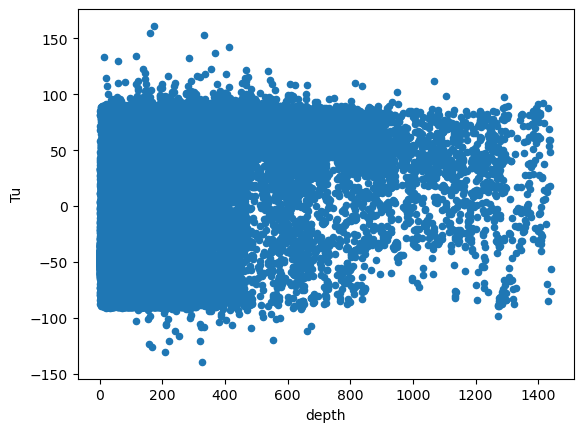

In [15]:
hallo.plot.scatter(x='depth', y='Tu')

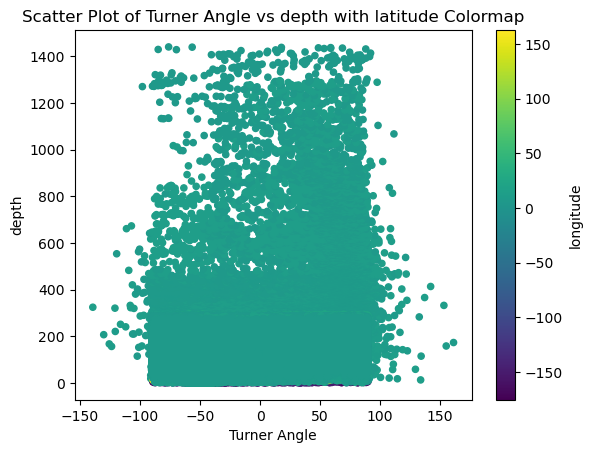

In [21]:
hallo.plot.scatter(x='Tu', y='depth', c='latitude', colormap='viridis')

plt.xlabel('Turner Angle')
plt.ylabel('depth')
plt.title('Scatter Plot of Turner Angle vs depth with latitude Colormap')

plt.show()

## assign labels to turner angle
0 is diffusive convection, 1 is doubly stable and 2 is salt fingering.

In [4]:
def Tu_label(data_arr):
    # Define the conditions and labels
    conditions = [
        (data_arr >= -90) & (data_arr < -45),
        (data_arr >= -45) & (data_arr < 45),
        (data_arr >= 45) & (data_arr < 90),
        (data_arr >= 90) & (data_arr < -90)
    ]
    labels = ['Diffusive Convection', 'Doubly stable', 'Salt fingering', 'Statically unstable']

    # Apply the conditions and labels to create a new array with the labels
    result = np.select(conditions, labels, default='NaN')

    # Create a new DataArray with the label
    labeled_arr = data_arr.copy()
    labeled_arr.values = result

    return labeled_arr

(array([587077.,      0.,      0., 267252.,      0.,      0., 179243.,
             0.,      0.,  12499.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

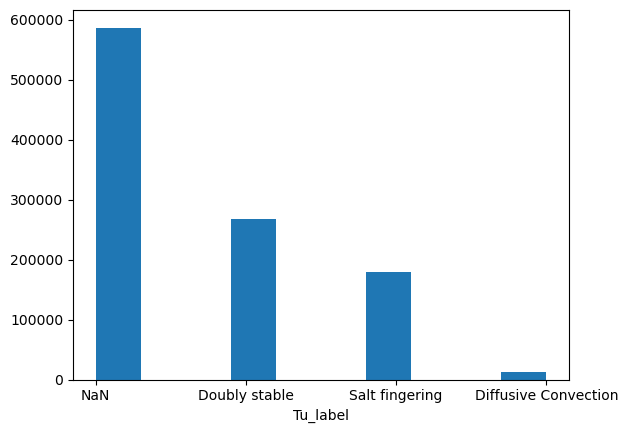

In [5]:
arctic_kappa["Tu_label"] = Tu_label(arctic_kappa.Tu)
arctic_kappa.Tu_label.plot.hist()

(array([14619.,     0.,     0.,  3411.,     0.,     0.,  5929.,     0.,
            0.,   260.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

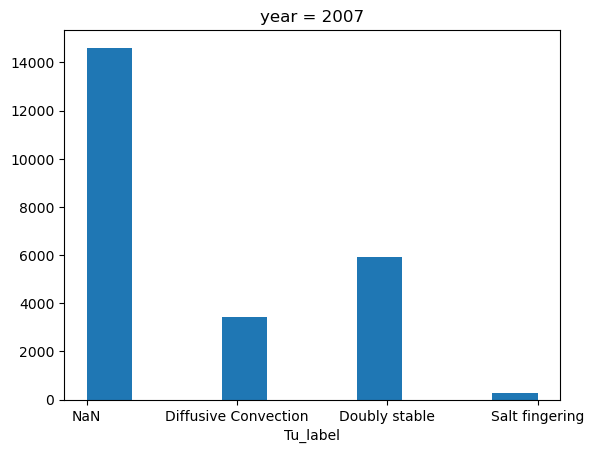

In [6]:
alberto_kappa["Tu_label"] = Tu_label(alberto_kappa.Tu)
alberto_kappa.Tu_label.plot.hist()

(array([241824.,      0.,      0., 146905.,      0.,      0., 293281.,
             0.,      0.,  58950.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

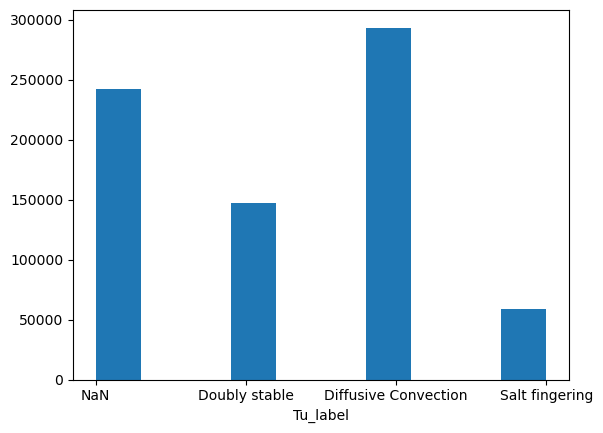

In [7]:
mosaic_kappa["Tu_label"] = Tu_label(mosaic_kappa.Tu)
mosaic_kappa.Tu_label.plot.hist()

(array([56491.,     0.,     0., 31181.,     0.,     0., 74757.,     0.,
            0., 13971.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

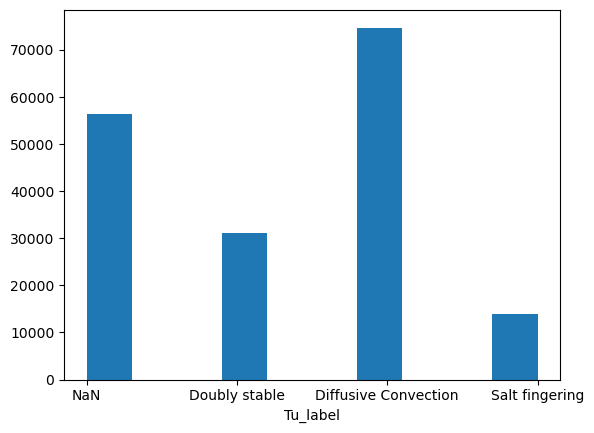

In [8]:
nice_kappa["Tu_label"] = Tu_label(nice_kappa.Tu)
nice_kappa.Tu_label.plot.hist()

(array([78249.,     0.,     0.,  6834.,     0.,     0., 10328.,     0.,
            0., 18703.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

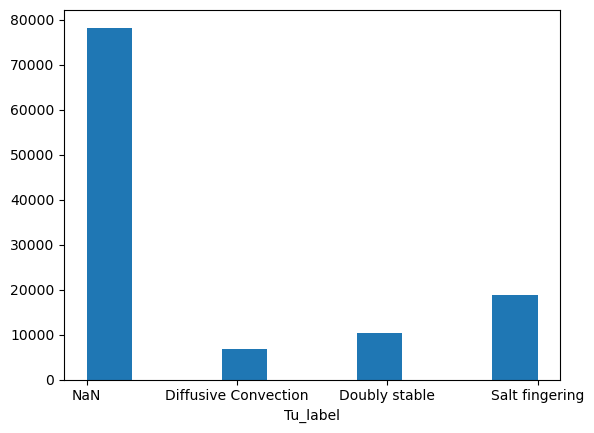

In [9]:
HM_kappa["Tu_label"] = Tu_label(HM_kappa.Tu)
HM_kappa.Tu_label.plot.hist()